In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('all_race_data.csv')

In [ ]:

def get_lap_time_change(driver, year, race, stops):
    driver_race_2024_df = (df[(df.race_name == f"{race}") & (df.driver_id == f"{driver}") & (df.year == year)])
    total_time = 0
    time_changes = []
    prev_lap = driver_race_2024_df.iloc[0, 5]
    for index, row in driver_race_2024_df.iterrows():
        total_time += row['lap_time']
        time_change = prev_lap - row['lap_time']
        if (-9 < time_change < 6):
            time_changes.append(time_change)
        prev_lap = row['lap_time']
    avg_time_change = sum(time_changes) / (len(time_changes) + 1)
    return avg_time_change, stops


In [4]:

# Create an empty list to store results
lap_time_changes = []

# Example of function calls
results = [
    ("max_verstappen", 2024, "Bahrain Grand Prix", 1),
    ("leclerc", 2024, "Bahrain Grand Prix", 1),
    ("alonso", 2024, "Saudi Arabian Grand Prix", 1),
    ("piastri", 2024, "Saudi Arabian Grand Prix", 1),
    ("sainz", 2024, "Australian Grand Prix", 2),
    ("perez", 2024, "Australian Grand Prix", 2),
    ("hamilton", 2024, "Australian Grand Prix", 1),
    ("norris", 2024, "Australian Grand Prix", 1),
    ("max_verstappen", 2024, "Japanese Grand Prix", 3),
    ("sainz", 2024, "Japanese Grand Prix", 3),
    ("russell", 2024, "Japanese Grand Prix", 3),
    ("kevin_magnussen", 2024, "Chinese Grand Prix", 2),
    ("ocon", 2024, "Chinese Grand Prix", 2),
    ("norris", 2024, "Chinese Grand Prix", 1),
    ("sainz", 2024, "Chinese Grand Prix", 1),
    ("max_verstappen", 2024, "Miami Grand Prix", 1),
    ("russell", 2024, "Miami Grand Prix", 1),
    ("alonso", 2024, "Emilia Romagna Grand Prix", 2),
    ("russell", 2024, "Emilia Romagna Grand Prix", 2),
    ("norris", 2024, "Emilia Romagna Grand Prix", 1),
    ("hamilton", 2024, "Emilia Romagna Grand Prix", 1),
    ("max_verstappen", 2023, "Monaco Grand Prix", 1),
    ("russell", 2023, "Monaco Grand Prix", 1),
    ("leclerc", 2023, "Monaco Grand Prix", 2),
    ("alonso", 2023, "Monaco Grand Prix", 2),
    ("max_verstappen", 2023, "Canadian Grand Prix", 2),
    ("leclerc", 2023, "Canadian Grand Prix", 2),
    ("sainz", 2024, "Spanish Grand Prix", 2),
    ("russell", 2024, "Spanish Grand Prix", 2),
    ("perez", 2024, "Austrian Grand Prix", 2),
    ("piastri", 2024, "Austrian Grand Prix", 2),
    ("max_verstappen", 2023, "British Grand Prix", 1),
    ("norris", 2023, "British Grand Prix", 1),
    ("russell", 2024, "Hungarian Grand Prix", 2),
    ("piastri", 2024, "Hungarian Grand Prix", 2),
    ("stroll", 2024, "Belgian Grand Prix", 1),
    ("russell", 2024, "Belgian Grand Prix", 1),
    ("hamilton", 2024, "Belgian Grand Prix", 2),
    ("piastri", 2024, "Belgian Grand Prix", 2),
    ("hamilton", 2024, "Dutch Grand Prix", 2),
    ("russell", 2024, "Dutch Grand Prix", 2),
    ("norris", 2024, "Dutch Grand Prix", 1),
    ("leclerc", 2024, "Dutch Grand Prix", 1),
    ("max_verstappen", 2024, "Italian Grand Prix", 2),
    ("piastri", 2024, "Italian Grand Prix", 2),
    ("leclerc", 2024, "Italian Grand Prix", 1),
    ("sainz", 2024, "Italian Grand Prix", 1),
    ("perez", 2024, "Azerbaijan Grand Prix", 1),
    ("hamilton", 2024, "Azerbaijan Grand Prix", 1),
    ("gasly", 2024, "Singapore Grand Prix", 1),
    ("alonso", 2024, "Singapore Grand Prix", 1),
    ("piastri", 2024, "United States Grand Prix", 1),
    ("leclerc", 2024, "United States Grand Prix", 1),
    ("hamilton", 2024, "Mexico City Grand Prix", 1),
    ("sainz", 2024, "Mexico City Grand Prix", 1),
    ("max_verstappen", 2023, "São Paulo Grand Prix", 4),
    ("norris", 2023, "São Paulo Grand Prix", 4),
    ("hamilton", 2023, "Las Vegas Grand Prix", 2),
    ("piastri", 2023, "Las Vegas Grand Prix", 2),
    ("albon", 2023, "Las Vegas Grand Prix", 1),
    ("leclerc", 2023, "Las Vegas Grand Prix", 1),
    ("gasly", 2023, "Qatar Grand Prix", 3),
    ("norris", 2023, "Qatar Grand Prix", 3),
    ("hamilton", 2023, "Abu Dhabi Grand Prix", 2),
    ("leclerc", 2023, "Abu Dhabi Grand Prix", 2)
    
]

for driver, year, race, stops in results:
    avg_time_change, stops = get_lap_time_change(driver, year, race, stops)
    lap_time_changes.append({
        "driver": driver,
        "year": year,
        "race": race,
        "avg_time_change": avg_time_change,
        "pit_stops": stops
    })
df = pd.DataFrame(lap_time_changes)

sorted_df = df.sort_values(by=['avg_time_change'])

In [5]:
sorted_df.to_csv('lap_time_change.csv', index=False)

This study observes the average lap time changes for each track. In order for this to be representitive it is imperative to choose different drivers and make sure that all strategies are covered. 

Text(0, 0.5, 'Average Lap time change (Positive = Quicker)')

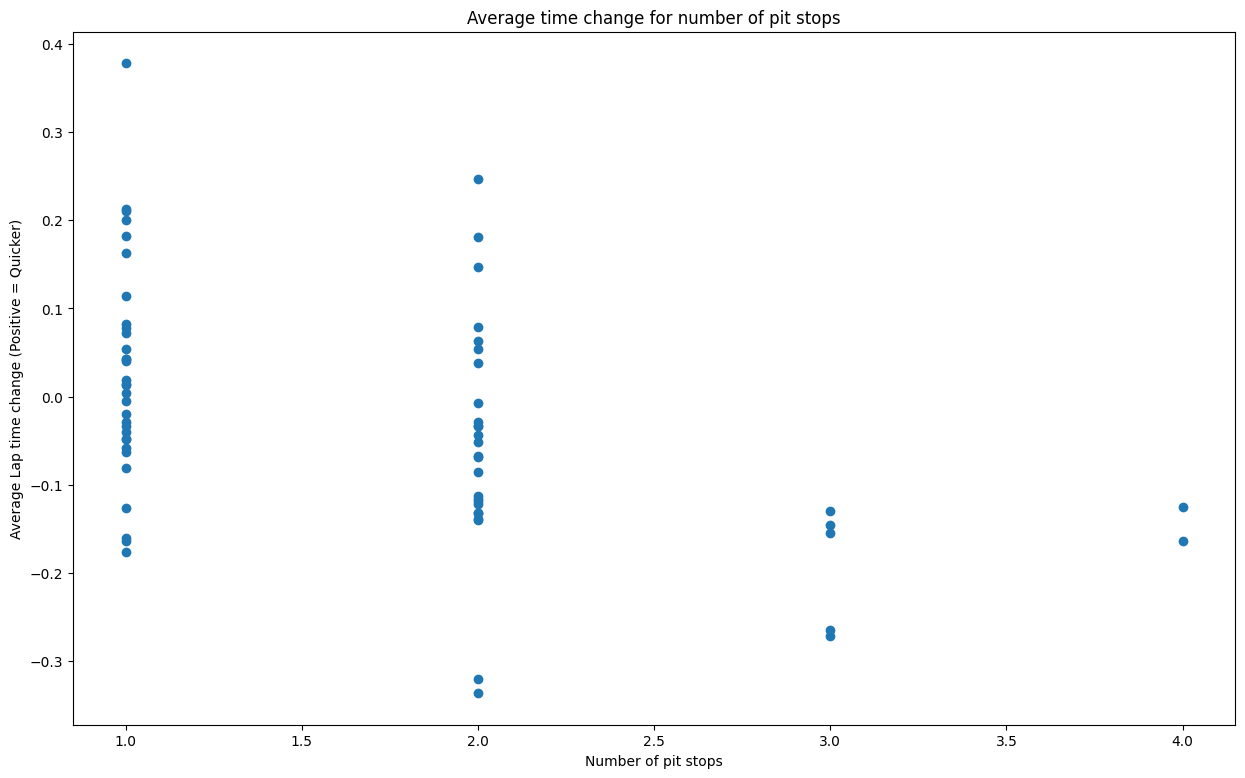

In [6]:
plt.figure(figsize=(15,9))
plt.scatter(sorted_df.pit_stops, sorted_df.avg_time_change)
plt.title("Average time change for number of pit stops")
plt.xlabel("Number of pit stops")
plt.ylabel("Average Lap time change (Positive = Quicker)")

/tmp/ipykernel_26599/713765625.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pit_stops', y='avg_time_change', data=sorted_df, width=0.4, fliersize=3, palette='pastel')


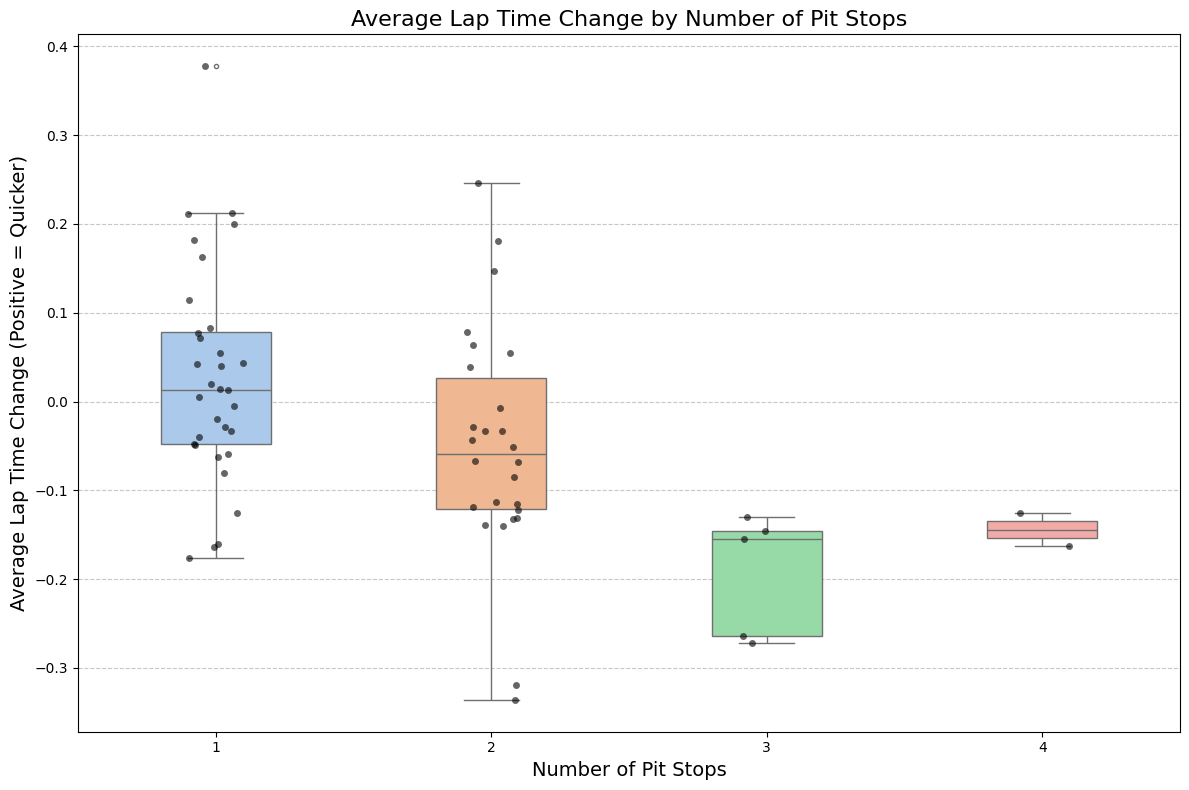

In [7]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='pit_stops', y='avg_time_change', data=sorted_df, width=0.4, fliersize=3, palette='pastel')
sns.stripplot(x='pit_stops', y='avg_time_change', data=sorted_df, color='black', alpha=0.6, jitter=True)

plt.title("Average Lap Time Change by Number of Pit Stops", fontsize=16)
plt.xlabel("Number of Pit Stops", fontsize=14)
plt.ylabel("Average Lap Time Change (Positive = Quicker)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Text(101.09722222222221, 0.5, 'Average lap time change')

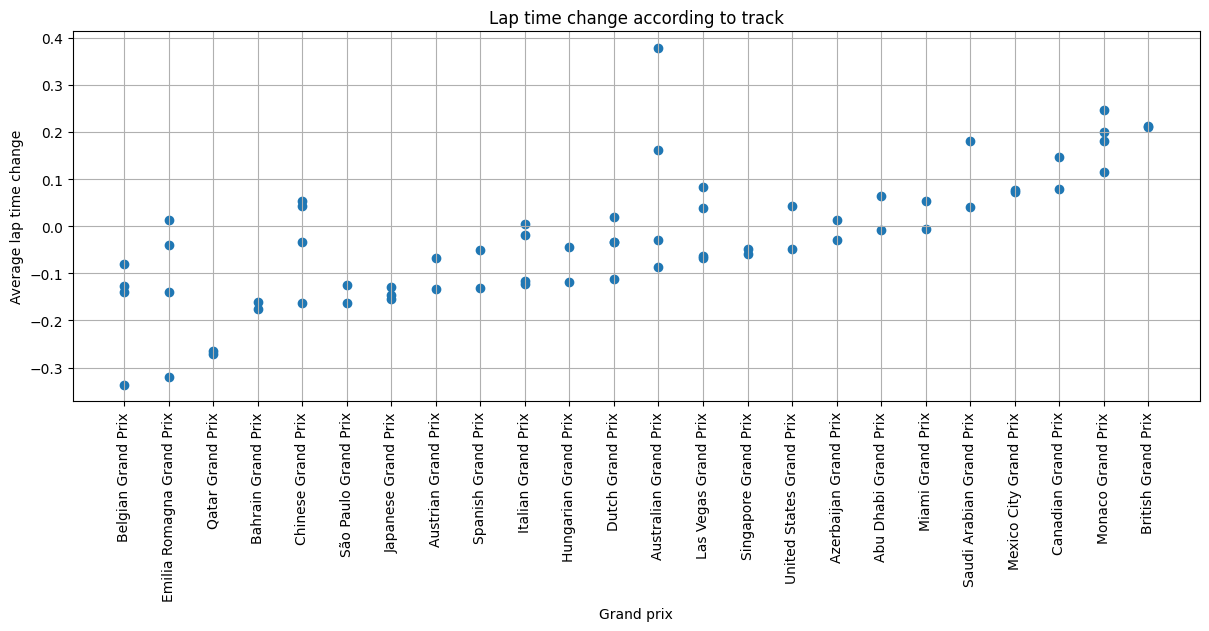

In [8]:
plt.figure(figsize=(12,6))
plt.scatter(sorted_df.race, sorted_df.avg_time_change)
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.title("Lap time change according to track")
plt.xlabel("Grand prix")
plt.ylabel("Average lap time change")

The two graphs above show the correlation between the number of pit stops and the average lap time change and then the track and the average lap time change. This is to indicate which tracks are higher in terms of tyre degredation and which strategies give way to higher changes in lap time or vice versa, as a higher change in lap time might give way to more pit stops. As seen in the graphs although the 1 stop has a wider spread the general rule is the more pit stops that are completed the more the lap time changes. In addition, if you have a positive lap time change, meaning the lap time was decreasing on average, then it is likely that the driver was on a one stop strategy. This can all be down to track layout, driver style, intended strategy and actually how much the driver is 'pushing'. We also see the different races and their respective lap time changes. From this we can see that the Belgian, Emilia Romangna, Qatar and Bahrain grand prix all seemingly have the worst tyre degredation. The Bahrain grand prix is a difficult one since it has been the first race of the year for a few seasons and so often teams use it as a learning experience. The graph also depicts the British, Canadian, Mexican and Monaco grand prix as ones with lower tyre degredation. The monaco grand prix is an outlier since it is so difficult to overtake during this race the strategies are completely unique. However, the rest of those races should be noted as low tyre degredation. 